In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [4]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

# 嘗試第一個模型

使用 softplus 、 softmax 、mse

使用兩層hidden layer，第一層先用4個神經元，第二層使用2個神經元

In [8]:
model_1 = Sequential()
model_1.add(Dense(4, input_dim = 28*28))
model_1.add(Activation('softplus'))
model_1.add(Dense(2))
model_1.add(Activation('softplus'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_1.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function 

In [10]:
model_1 = model_1.fit(x_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0925 - acc: 0.1115
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0900 - acc: 0.1124
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124
Epoch 8/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124
Epoch 9/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0900 - acc: 0.1124
Epoch 10/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0900 - acc: 0.1124

很可惜，準確率只有11%，比老師測試的還低

# 嘗試第二個模型

想試試看若增加神經元個數，是否會增加準確率?


In [11]:
model_2 = Sequential()
model_2.add(Dense(10, input_dim = 28*28))
model_2.add(Activation('softplus'))
model_2.add(Dense(10))
model_2.add(Activation('softplus'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))
model_2.summary()
model_2.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function
model_2 = model_2.fit(x_train,y_train,batch_size=100,epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

這次將第一層和第二層的神經元個數提升到10個，準確率從11% --- 57%

上升蠻多的，但想繼續嘗試是否有效率更高的方式

# 嘗試第三個模型

In [12]:
model_3= Sequential()
model_3.add(Dense(4, input_dim = 28*28))
model_3.add(Activation('hard_sigmoid'))
model_3.add(Dense(2))
model_3.add(Activation('hard_sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('hard_sigmoid'))
model_3.summary()
model_3.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function
model_3 =model_3.fit(x_train,y_train,batch_size=100,epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_7 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

想說過去老師用的hidden layer三層不一樣，這次想試試看都一模一樣使用hard_sigmoid，結果看起來也不錯

# 嘗試第四個模型

沿用第三個，想試試每次訓練的數量增加，看會不會增加準確率

In [13]:
model_4= Sequential()
model_4.add(Dense(4, input_dim = 28*28))
model_4.add(Activation('hard_sigmoid'))
model_4.add(Dense(2))
model_4.add(Activation('hard_sigmoid'))
model_4.add(Dense(10))
model_4.add(Activation('hard_sigmoid'))
model_4.summary()
model_4.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function
model_4 =model_4.fit(x_train,y_train,batch_size=200,epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_10 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_11 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

雖然有提高，但是只有小幅度提升

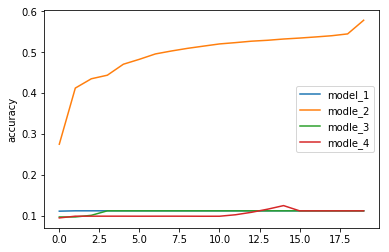

In [24]:
plt.plot(model_1.history["acc"])
plt.plot(model_2.history["acc"])
plt.plot(model_3.history["acc"])
plt.plot(model_4.history["acc"])

plt.ylabel('accuracy')
plt.legend(['model_1','modle_2','modle_3','modle_4'],loc = 'best')

從上面4個，接下來要來找最好的模型，方向可能是增加神經元素量和hidden layer著手

# 第一個最佳解

將第一個神經元數量提升至20，第二個提升至100

In [21]:
model_best = Sequential()
model_best.add(Dense(20, input_dim = 28*28))
model_best.add(Activation('softplus'))
model_best.add(Dense(100))
model_best.add(Activation('softplus'))
model_best.add(Dense(10))
model_best.add(Activation('softmax'))
model_best.summary()
model_best.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function
model_best = model_best.fit(x_train,y_train,batch_size=100,epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                15700     
_________________________________________________________________
activation_22 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               2100      
_________________________________________________________________
activation_23 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 18,810
Trainable params: 18,810
Non-trainable params: 0
_________________________________________________________________
Epoch 

# 第二個最佳解

考慮神經元數量與所在的hidden layer 是否會造成影響，所以將第一層和第二層神經元數量調換

In [22]:
model_best_2 = Sequential()
model_best_2.add(Dense(100, input_dim = 28*28))
model_best_2.add(Activation('softplus'))
model_best_2.add(Dense(20))
model_best_2.add(Activation('softplus'))
model_best_2.add(Dense(10))
model_best_2.add(Activation('softmax'))
model_best_2.summary()
model_best_2.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function
model_best_2 = model_best_2.fit(x_train,y_train,batch_size=100,epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_25 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                2020      
_________________________________________________________________
activation_26 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total params: 80,730
Trainable params: 80,730
Non-trainable params: 0
_________________________________________________________________
Epoch 

可以發現，最後的結果其實差不多，但是一開始的準確率數度會不太一樣。

# 第三個最佳解

最後來嘗試增加hidden layer

In [23]:
model_best_3 = Sequential()
model_best_3.add(Dense(100, input_dim = 28*28))
model_best_3.add(Activation('softplus'))
model_best_3.add(Dense(20))
model_best_3.add(Activation('softplus'))
model_best_3.add(Dense(20))
model_best_3.add(Activation('softplus'))
model_best_3.add(Dense(10))
model_best_3.add(Activation('softmax'))
model_best_3.summary()
model_best_3.compile(loss = "mse",optimizer=SGD(lr = 0.05),metrics=["accuracy"]) #告知loss function
model_best_3 = model_best_3.fit(x_train,y_train,batch_size=100,epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_28 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 20)                2020      
_________________________________________________________________
activation_29 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
activation_30 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                210       
__________

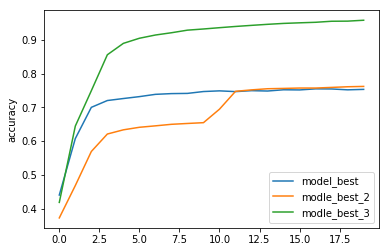

In [25]:
plt.plot(model_best.history["acc"])
plt.plot(model_best_2.history["acc"])
plt.plot(model_best_3.history["acc"])


plt.ylabel('accuracy')
plt.legend(['model_best','modle_best_2','modle_best_3'],loc = 'best')

# 結論

我認為要提高準確率可以使用

1. 提高其中的神經元數量
2. 增加hidden layer 數量
3. 多訓練幾次，並多嘗試